In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000)  # Normal sensor readings
anomaly_indices = np.random.choice(1000, size=20, replace=False)  # Generating 20 anomalies
anomalies = np.random.normal(loc=5, scale=1, size=20)  # Anomalies with different mean
data = np.copy(normal_data)
data[anomaly_indices] = anomalies

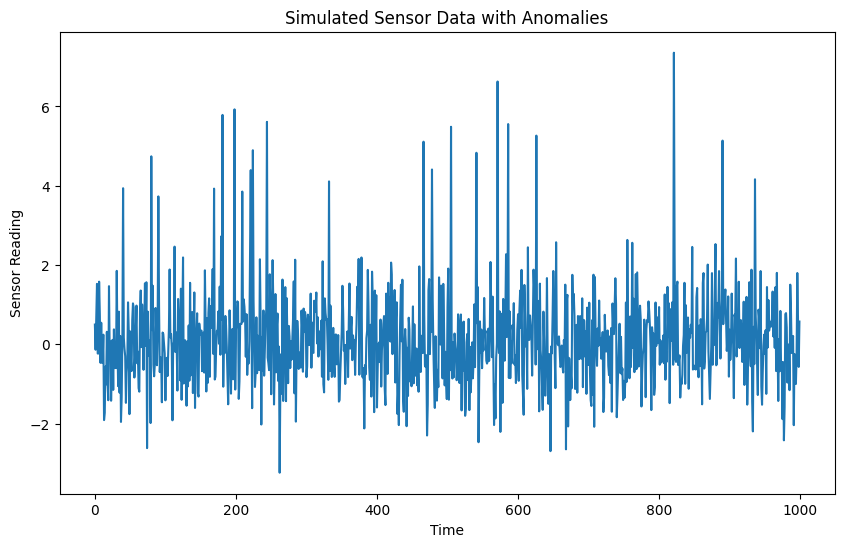

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Simulated Sensor Data with Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.show()

In [4]:
data = data.reshape(-1, 1)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(data)
anomalies_detected = data[outlier_labels == -1]

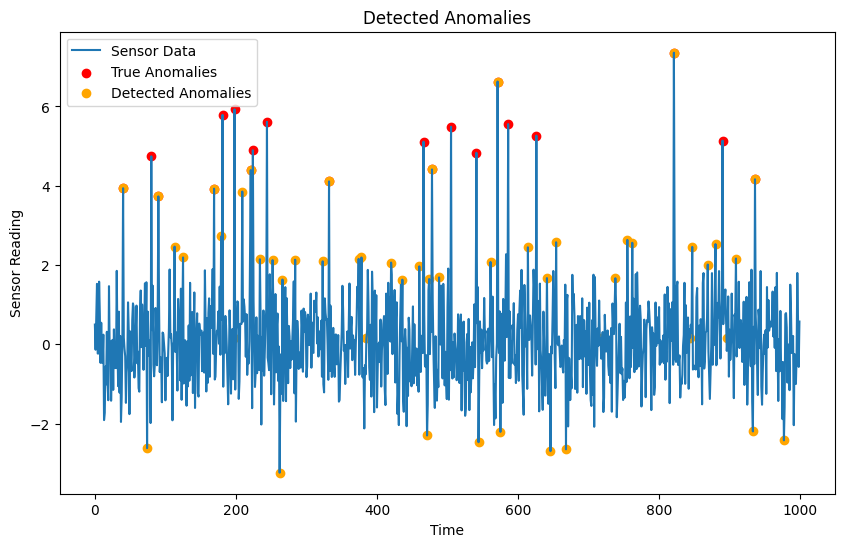

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Sensor Data')
plt.scatter(anomaly_indices, anomalies, color='red', label='True Anomalies')
plt.scatter(np.where(outlier_labels == -1)[0], anomalies_detected, color='orange', label='Detected Anomalies')
plt.title('Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend()
plt.show()
